In [1]:
%load_ext autoreload
%autoreload 2
from thumbnails import MeshRenderer
import PIL.Image

### Data paths and meshnames

In [2]:
datapath = '/Users/cam/data/dSpaceX/latest/nanoparticles_mesh/unprocessed_data/shape_representations/'
meshnames = ['1.ply', '2.ply', '100.ply', '200.ply', '1000.ply', '2000.ply']

### Make sure default MeshRenderer is same as pvMeshRenderer (from thumbnails/__init__.py)

In [3]:
from thumbnails.pyvista_mesh_renderer import pvMeshRenderer
rena = MeshRenderer(datapath + meshnames[0])
renb = pvMeshRenderer(datapath + meshnames[0])
print(type(rena))
print(type(renb))
del rena, renb

<class 'thumbnails.pyvista_mesh_renderer.pvMeshRenderer'>
<class 'thumbnails.pyvista_mesh_renderer.pvMeshRenderer'>


### start the default renderer (offscreen with axis-aligned silouette views)

In [4]:
ren = MeshRenderer(datapath + meshnames[0])

### image tests
- get current image
- get the current camera position
- change image, look at that
- set camera position to that of first image and look at that
- render at higher resolution

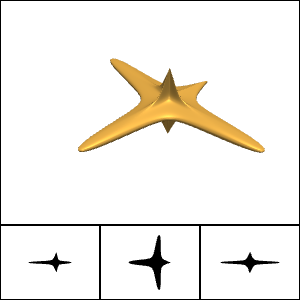

In [5]:
img = ren.getImage()
PIL.Image.fromarray(img)

In [6]:
cpos = ren.getCameraPos()

ERROR: cannot load 2.ply


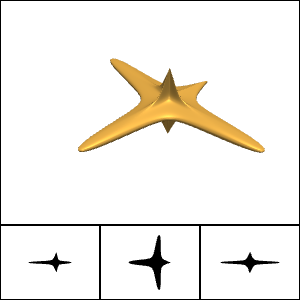

In [7]:
ren.loadNewMesh(meshnames[1])
img = ren.getImage()
PIL.Image.fromarray(img)

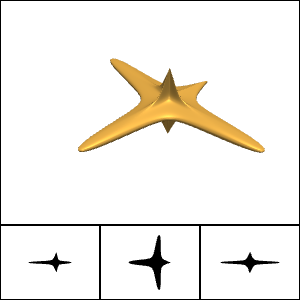

In [8]:
ren.setCameraPos(cpos)
img = ren.getImage()
PIL.Image.fromarray(img)

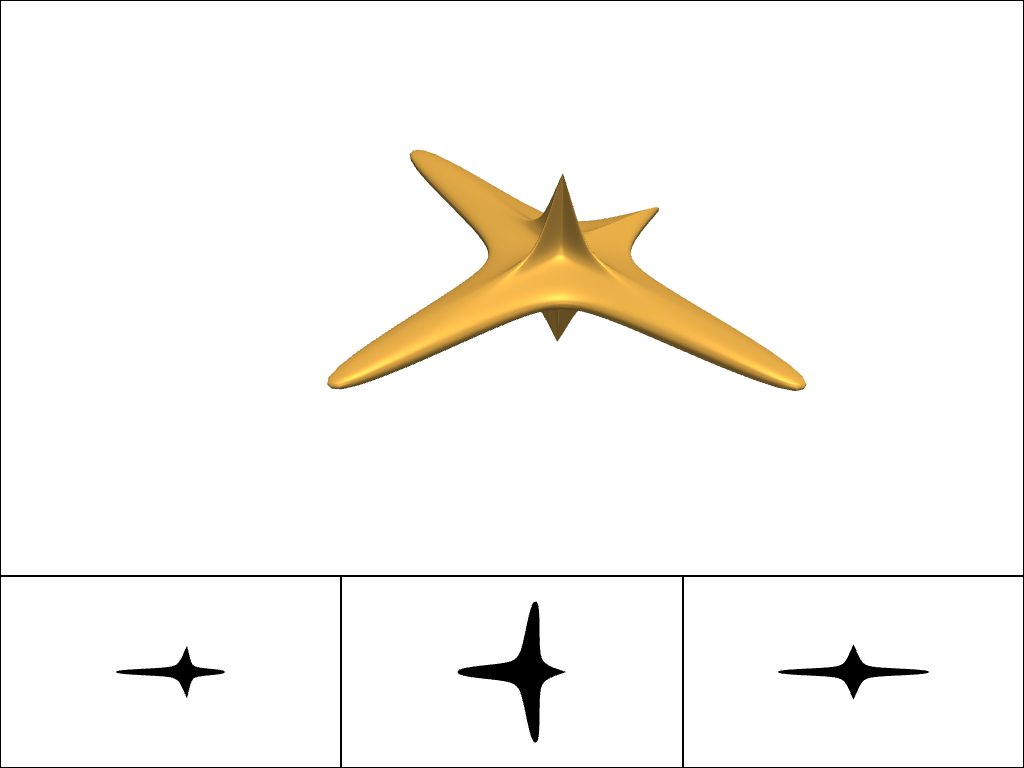

In [9]:
img = ren.getImage(resolution=[1024, 768])
PIL.Image.fromarray(img)

### update vertices test
- generate new vertices using numpy
- update and get new image

In [10]:
import numpy as np
from vtk.util import numpy_support
ren.loadNewMesh(meshnames[0])
verts = ren.polydata.GetPoints()
npverts = numpy_support.vtk_to_numpy(verts.GetData())
npverts.shape

ERROR: cannot load 1.ply


(99856, 3)

In [11]:
npverts[1000:1010]

array([[-0.01496157, -0.02532744, -1.4270215 ],
       [-0.01484068, -0.02630728, -1.4270215 ],
       [-0.01472577, -0.02736507, -1.4270215 ],
       [-0.01461703, -0.02851157, -1.4270215 ],
       [-0.01451468, -0.02975951, -1.4270215 ],
       [-0.01441906, -0.03112415, -1.4270215 ],
       [-0.01433055, -0.03262381, -1.4270215 ],
       [-0.01424961, -0.03428067, -1.4270215 ],
       [-0.01417677, -0.03612181, -1.4270215 ],
       [-0.01411253, -0.03818037, -1.4270215 ]], dtype=float32)

In [12]:
# mutiple the z axis by 2.0
npverts[:,2] *= 2.0
npverts[1000:1010]

array([[-0.01496157, -0.02532744, -2.854043  ],
       [-0.01484068, -0.02630728, -2.854043  ],
       [-0.01472577, -0.02736507, -2.854043  ],
       [-0.01461703, -0.02851157, -2.854043  ],
       [-0.01451468, -0.02975951, -2.854043  ],
       [-0.01441906, -0.03112415, -2.854043  ],
       [-0.01433055, -0.03262381, -2.854043  ],
       [-0.01424961, -0.03428067, -2.854043  ],
       [-0.01417677, -0.03612181, -2.854043  ],
       [-0.01411253, -0.03818037, -2.854043  ]], dtype=float32)

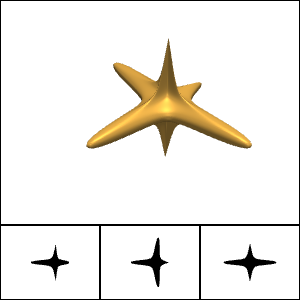

In [13]:
ren.updateVertices(npverts)
img = ren.getImage()
PIL.Image.fromarray(img)

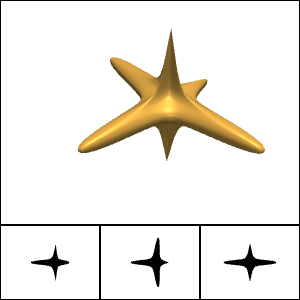

In [14]:
# since we just made z bigger, I like using the original camera view
ren.setCameraPos(cpos)
img = ren.getImage()
PIL.Image.fromarray(img)

In [15]:
# camera wasn't being reset when vertices were updated. Now it is, so this image will never appear again 

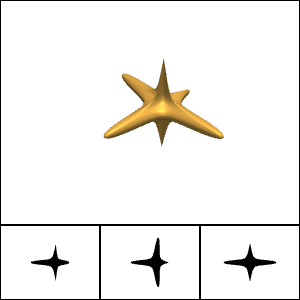

In [16]:
# reset_camera still does it's thing, so not quite as close as the setCameraPos function
ren.plotter.reset_camera()
img = ren.getImage()
PIL.Image.fromarray(img)

### single-image view renderer

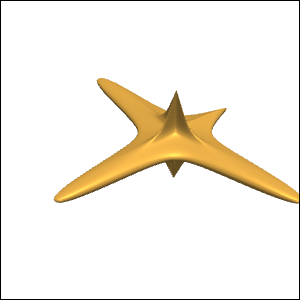

In [17]:
ren = MeshRenderer(datapath + meshnames[0], singleview=True)
img = ren.getImage()
PIL.Image.fromarray(img)

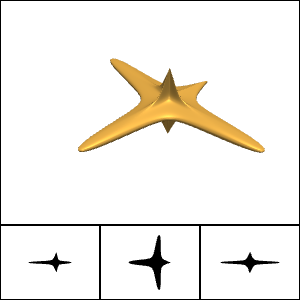

In [30]:
ren = MeshRenderer(datapath + meshnames[0])
img = ren.getImage()
PIL.Image.fromarray(img)

### replace with a fresh copy of vertices

In [31]:
lmnopverts = npverts.copy()

In [32]:
lmnopverts[:,1] /= 20.5

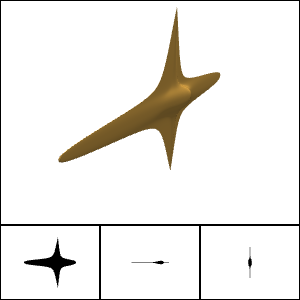

In [33]:
ren.updateVertices(lmnopverts)
img = ren.getImage()
PIL.Image.fromarray(img)

In [22]:
ren.plotter.bounds

[-0.11306986212730408,
 0.211944580078125,
 -4.329868793487549,
 4.329868793487549,
 -3.23586368560791,
 3.23586368560791]

In [23]:
ren.plotter.reset_camera()
ren.plotter.isometric_view()

In [24]:
import pyvista
mesh = pyvista.PolyData(ren.polydata)

### onscreen interactive renderer

In [34]:
ren = MeshRenderer(datapath + meshnames[0], singleview=True, onscreen=True)

In [35]:
ren = MeshRenderer(datapath + meshnames[0], singleview=False, onscreen=True)